# PROBLEM STATEMENT

**"Implementing Auto Encoders Concept (Stacked or Deep)"**

### Loading MINST Dataset

In [3]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print('X_train: ' + str(train_images.shape))
print('Y_train: ' + str(train_labels.shape))
print('X_test:  ' + str(test_images.shape))
print('Y_test:  ' + str(test_labels.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


<hr>

### Adding Noise to data

In [28]:
import numpy as np, matplotlib.pyplot as plt

In [24]:
std_dev = 25

noise = np.random.normal(loc=0, scale=std_dev, size=train_images.shape)

noisy_images = train_images + noise

noisy_images = np.clip(noisy_images, 0, 255)

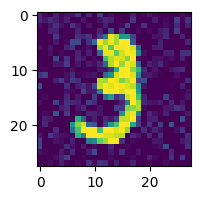

In [26]:
plt.figure(figsize=(2,2))

plt.imshow(noisy_images[10])

<hr>

### Designing the Auto-Encoder

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Reshape, Input, Flatten

auto_encoder = Sequential()

In [31]:
auto_encoder.add(Input(shape=(28,28,1)))
auto_encoder.add(Flatten())

Encoder Part

In [32]:
auto_encoder.add(Dense(128, activation='relu'))

auto_encoder.add(Dense(64, activation='relu'))

auto_encoder.add(Dense(32, activation='relu'))

Decoder Part

In [33]:
auto_encoder.add(Dense(64, activation='relu'))

auto_encoder.add(Dense(128, activation='relu'))

auto_encoder.add(Dense(784, activation='relu'))         ## because input is 28 x 28 = 784

In [34]:
auto_encoder.add(Reshape((28,28,1)))

Design of the entire auto-encoder

In [35]:
auto_encoder.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 784)            │       101,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

<hr>

### Compilation and Training

In [36]:
auto_encoder.compile(optimizer='Adam', loss='binary_crossentropy')

In [37]:
auto_encoder.fit(noisy_images, train_images, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: -193.0599
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: -204.3061
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: -212.6039
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: -215.4149
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: -216.1976
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: -215.2186
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: -215.7066
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: -215.7010
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: -216.0144
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: -215.5687
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: -216.1003
Epoch 12/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: -216.1858
Epoch 13/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: -215.7289
Epoch 14/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - los

<hr>

### Predictions and Output

In [38]:
preds = auto_encoder.predict_on_batch(test_images)

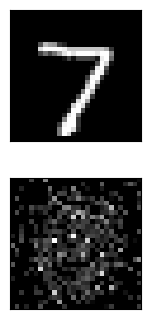

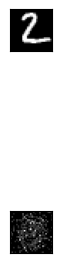

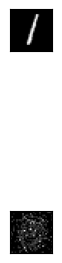

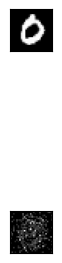

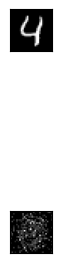

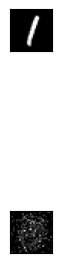

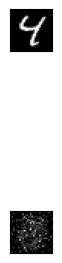

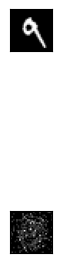

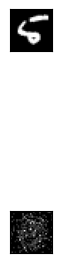

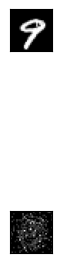

In [40]:
n = 10

plt.figure(figsize=(20, 4))
  
for i in range(n):    
    ax = plt.subplot(2, n, i + 1)    
    plt.imshow(test_images[i].reshape(28, 28))    
    plt.gray()    
    ax.get_xaxis().set_visible(False)    
    ax.get_yaxis().set_visible(False)  
      
    ax = plt.subplot(2, n, i + 1 + n)    
    plt.imshow(preds[i].reshape(28, 28))    
    plt.gray()    
    ax.get_xaxis().set_visible(False)    
    ax.get_yaxis().set_visible(False)
    plt.show()

<hr><hr>